## IMDB 데이터셋으로 LSTM 학습시키기

In [1]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 350

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
D:\anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\anaconda\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must spec

(25000,) (25000,)
(25000,) (25000,)
350


In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          24832     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 64)          33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 390,305
Trainable params: 390,305
Non-trainable params: 0
_________________________________________________________________


In [3]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 15, 
                    validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 132s 204ms/step - loss: 0.5422 - acc: 0.7071 - val_loss: 0.3751 - val_acc: 0.8544
Epoch 2/15
625/625 [==============================] - 124s 198ms/step - loss: 0.2573 - acc: 0.9035 - val_loss: 0.3592 - val_acc: 0.8670
Epoch 3/15
625/625 [==============================] - 119s 190ms/step - loss: 0.1749 - acc: 0.9389 - val_loss: 0.3412 - val_acc: 0.8556
Epoch 4/15
625/625 [==============================] - 121s 193ms/step - loss: 0.1428 - acc: 0.9513 - val_loss: 0.4062 - val_acc: 0.8676
Epoch 5/15
625/625 [==============================] - 120s 193ms/step - loss: 0.0902 - acc: 0.9703 - val_loss: 0.4453 - val_acc: 0.8648
Epoch 6/15
625/625 [==============================] - 122s 196ms/step - loss: 0.0721 - acc: 0.9780 - val_loss: 0.5273 - val_acc: 0.8458
Epoch 7/15
625/625 [==============================] - 124s 198ms/step - loss: 0.0829 - acc: 0.9735 - val_loss: 0.5239 - val_acc: 0.8610
Epoch 8/15
625/625 [============================

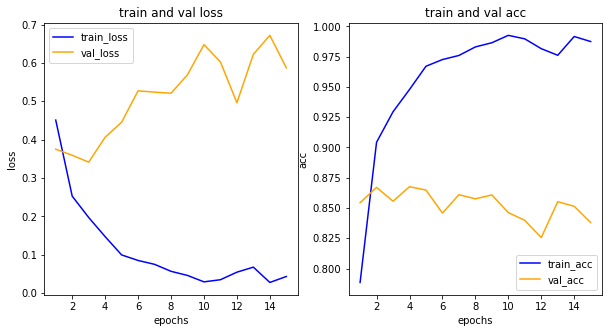

In [4]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

## reuters 데이터셋 다뤄보기

In [5]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=num_words)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)

print(len(pad_X_train[0]))

2113536/2110848 [==============================] - 0s 0us/step


D:\anaconda\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\anaconda\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


(8982,) (8982,)
(2246,) (2246,)
500


## LSTM 층을 사용하여 모델 구성하기

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding  

model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 64))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(46, activation = 'softmax'))

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['acc'])

## 모델 학습하기

In [7]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 20, 
                    validation_split = 0.2)

Epoch 1/20
225/225 [==============================] - 55s 233ms/step - loss: 2.8111 - acc: 0.3438 - val_loss: 2.4120 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 51s 229ms/step - loss: 2.3656 - acc: 0.3737 - val_loss: 2.0817 - val_acc: 0.4858
Epoch 3/20
225/225 [==============================] - 51s 226ms/step - loss: 2.0451 - acc: 0.4938 - val_loss: 1.9528 - val_acc: 0.5225
Epoch 4/20
225/225 [==============================] - 50s 222ms/step - loss: 1.8665 - acc: 0.5368 - val_loss: 1.7435 - val_acc: 0.5609
Epoch 5/20
225/225 [==============================] - 50s 221ms/step - loss: 1.7088 - acc: 0.5587 - val_loss: 1.8891 - val_acc: 0.5376
Epoch 6/20
225/225 [==============================] - 50s 222ms/step - loss: 1.6637 - acc: 0.5654 - val_loss: 1.7372 - val_acc: 0.5426
Epoch 7/20
225/225 [==============================] - 50s 222ms/step - loss: 1.5812 - acc: 0.5702 - val_loss: 1.6533 - val_acc: 0.5726
Epoch 8/20
225/225 [==============================] - 5

## 학습과정 그리기

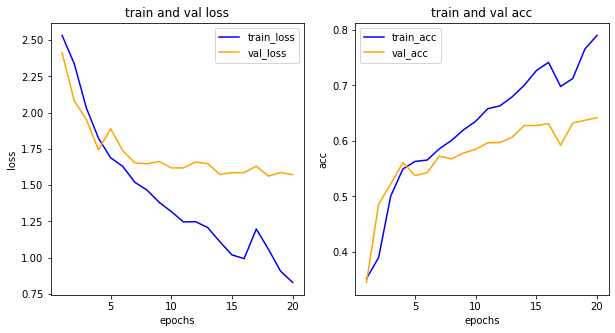

In [8]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()